The `lca-tools` suite is in the midst of a major refactor to, among other things, completely rework the Qdb, and to reduce the importance of the catalog for simple, single-archive queries (but is there such a thing? LCIA is always separate).  Obviously the refactor is going to be influenced by how hard / annoying it was to do this study.

### Part 0: LCIA setup

In [2]:
from antelope_catalog.providers import EcoinventLcia
from lcatools import enum

In [3]:
L = EcoinventLcia('/data/LCI/LCIA implementation v3.1 2014_08_13.xlsx', ns_uuid='46802ca5-8b25-398c-af10-2376adaa4623')
%time L.load_all()

local.ecoinvent.3.1.lcia: /data/LCI/LCIA implementation v3.1 2014_08_13.xlsx
Loading /data/LCI/LCIA implementation v3.1 2014_08_13.xlsx
702 new quantity entities added (702 total)
3255 new flow entities added (3255 total)
CPU times: user 24.3 s, sys: 251 ms, total: 24.5 s
Wall time: 24.8 s


In [6]:
recipes = enum(L.make_interface('index').lcia_methods(Method='recipe midpoint \(H\)$'))

 [00] ReCiPe Midpoint (H), climate change, GWP100 [kg CO2-Eq] [LCIA]
 [01] ReCiPe Midpoint (H), terrestrial acidification, TAP100 [kg SO2-Eq] [LCIA]
 [02] ReCiPe Midpoint (H), photochemical oxidant formation, POFP [kg NMVOC] [LCIA]
 [03] ReCiPe Midpoint (H), particulate matter formation, PMFP [kg PM10-Eq] [LCIA]
 [04] ReCiPe Midpoint (H), fossil depletion, FDP [kg oil-Eq] [LCIA]
 [05] ReCiPe Midpoint (H), ozone depletion, ODPinf [kg CFC-11-Eq] [LCIA]
 [06] ReCiPe Midpoint (H), marine ecotoxicity, METPinf [kg 1,4-DCB-Eq] [LCIA]
 [07] ReCiPe Midpoint (H), natural land transformation, NLTP [m2] [LCIA]
 [08] ReCiPe Midpoint (H), water depletion, WDP [m3] [LCIA]
 [09] ReCiPe Midpoint (H), human toxicity, HTPinf [kg 1,4-DCB-Eq] [LCIA]
 [10] ReCiPe Midpoint (H), freshwater eutrophication, FEP [kg P-Eq] [LCIA]
 [11] ReCiPe Midpoint (H), metal depletion, MDP [kg Fe-Eq] [LCIA]
 [12] ReCiPe Midpoint (H), freshwater ecotoxicity, FETPinf [kg 1,4-DCB-Eq] [LCIA]
 [13] ReCiPe Midpoint (H), agricultura

In [7]:
from lcatools.qdb import Qdb

In [10]:
qdb = Qdb()

Loading JSON data from /data/GitHub/lca-tools/lcatools/qdb/data/flowable_synlist.json:
Loading JSON data from /data/GitHub/lca-tools/lcatools/qdb/data/quantity_synlist.json:
local.qdb: /data/GitHub/lca-tools/lcatools/qdb/data/elcd_reference_quantities.json
Loading JSON data from /data/GitHub/lca-tools/lcatools/qdb/data/elcd_reference_quantities.json:
local.qdb: /data/GitHub/lca-tools/lcatools/providers/data/elcd_reference_quantities.json
24 new quantity entities added (24 total)
5 new flow entities added (5 total)


In [8]:
mass = next(L.make_interface('index').quantities(Name='^mass'))

In [12]:
qdb._q.add_synonyms('Mass', mass.uuid)

12

In [13]:
mass.show()

Quantity Entity (ref 96225d73-5ff0-4c97-9254-03b0b2750619)
origin: local.ecoinvent.3.1.lcia
reference: [[kg]]
   Name: Mass
Comment: 


In [17]:
mass.reference_entity = mass.reference_entity.unitstring

In [18]:
Lqi = L.make_interface('quantity')

In [19]:
for q in recipes:
    for cf in Lqi.factors(q):
        qdb.add_cf(cf)

## Part I. How many Trucks?
The first part of the critique is inspired by the question, "how many trucks are there in Ecoinvent, really?" and asks whether the uncertainty distributions developed through Monte Carlo analysis encompass even that [limited] variability.

The approach here is simple: compare the observed variability in Ecoinvent across truck types (all EURO-type) against the Monte Carlo uncertainty in the truck, unspecified category.

Further audit the use of the truck, unspecified category to evaluate the significance of the finding to endogenous ecoinvent.

In [21]:
from antelope_background.background import tarjan_background

In [22]:
from lcatools import archive_from_json, enum

In [23]:
e34c_i = archive_from_json('/data/LCI/Ecoinvent/3.4/cutoff_index.json.gz')

Loading JSON data from /data/LCI/Ecoinvent/3.4/cutoff_index.json.gz:
local.ecoinvent.3.4.cutoff.index__20180904: /data/LCI/Ecoinvent/3.4/cutoff_index.json.gz
local.ecoinvent.3.4.cutoff: /data/LCI/Ecoinvent/3.4/ecoinvent 3.4_cutoff_ecoSpold02
19 new quantity entities added (19 total)
13459 new process entities added (13459 total)
4881 new flow entities added (4881 total)


In [24]:
bg = tarjan_background(e34c_i, source='/data/LCI/Ecoinvent/3.4/cutoff_bg_tarjan.mat')

Loading JSON data from /data/LCI/Ecoinvent/3.4/cutoff_bg_tarjan.mat.index.json.gz:


In [25]:
lorries = enum(e34c_i.make_interface('index').processes(Name=('^market for transport', 'freight', 'lorry')))

 [00] market for transport, freight, lorry with refrigeration machine, freezing [GLO]
 [01] market for transport, freight, lorry with refrigeration machine, 3.5-7.5 ton, EURO3, R134a refrigerant, freezing [GLO]
 [02] market for transport, freight, lorry with refrigeration machine, 3.5-7.5 ton, EURO6, carbon dioxide, liquid refri(...)_5 [GLO]
 [03] market for transport, freight, lorry >32 metric ton, EURO3 [GLO]
 [04] market for transport, freight, lorry with refrigeration machine, 7.5-16 ton, EURO3, R134a refrigerant, freezing [GLO]
 [05] market for transport, freight, lorry 7.5-16 metric ton, EURO5 [GLO]
 [06] market for transport, freight, lorry with refrigeration machine, 3.5-7.5 ton, EURO5, R134a refrigerant, freezing [GLO]
 [07] market for transport, freight, lorry with refrigeration machine, 7.5-16 ton, EURO3, carbon dioxide, liquid refrig(...)_4 [GLO]
 [08] market for transport, freight, lorry 3.5-7.5 metric ton, EURO4 [GLO]
 [09] market for transport, freight, lorry with refrig

In [36]:
_qg = (_q for _q in recipes)

In [39]:
q = next(_qg)

In [60]:
import numpy as np

In [64]:
def sample_lcias(_uprs, _qtys):
    _vals = np.zeros(shape=(len(_uprs), len(_qtys)))
    for i, _upr in enumerate(_uprs):
        inv = [x for x in bg.lci(_upr.external_ref, _upr.reference().flow.external_ref)]
        for j, _q in enumerate(_qtys):
            res = qdb.do_lcia(_q, inv)
            _vals[i, j] = res.total()
    return _vals

In [101]:
ress = sample_lcias(lorries, recipes)

completed 66 iterations
completed 66 iterations
completed 68 iterations
completed 65 iterations
completed 66 iterations
completed 66 iterations
completed 66 iterations
completed 67 iterations
completed 67 iterations
completed 67 iterations
completed 66 iterations
completed 67 iterations
completed 67 iterations
completed 67 iterations
completed 66 iterations
completed 66 iterations
completed 66 iterations
completed 68 iterations
completed 66 iterations
completed 67 iterations
completed 67 iterations
completed 67 iterations
completed 67 iterations
completed 66 iterations
completed 66 iterations
completed 66 iterations
completed 66 iterations
completed 68 iterations
completed 66 iterations
completed 65 iterations
completed 66 iterations
completed 66 iterations
completed 68 iterations
completed 65 iterations
completed 66 iterations
completed 66 iterations
completed 64 iterations
completed 68 iterations
completed 66 iterations
completed 66 iterations
completed 68 iterations
completed 66 ite

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline

In [27]:
def do_hist(_qty, _res):
    plt.hist(_res, bins=20)
    plt.title(_qty['Name'])
    plt.xlabel(_qty['Indicator'])
    print('Range ratio: %g' % (max(_res) / min(_res)))

Range ratio: 7.74044


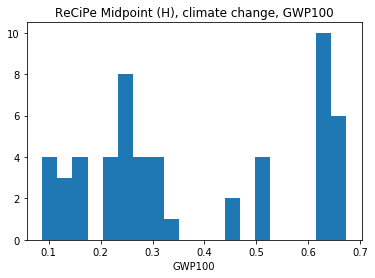

In [102]:
do_hist(recipes[0], ress[:,0])

Range ratio: 5.60764


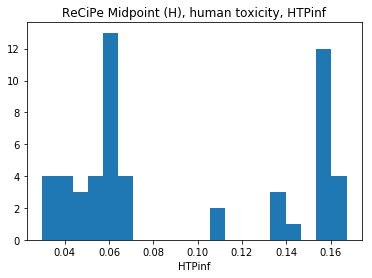

In [103]:
do_hist(recipes[9], ress[:,9])

Range ratio: 14.0092


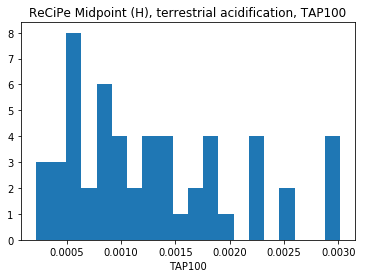

In [104]:
do_hist(recipes[1], ress[:,1])

Range ratio: 16.6262


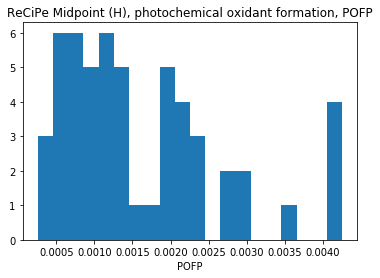

In [105]:
do_hist(recipes[2], ress[:,2])

Range ratio: 9.29744


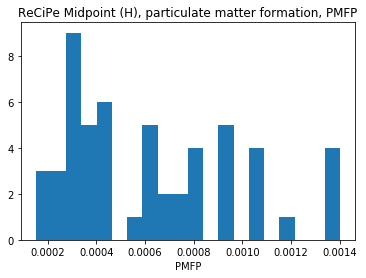

In [106]:
do_hist(recipes[3], ress[:,3])

Range ratio: 7.34615


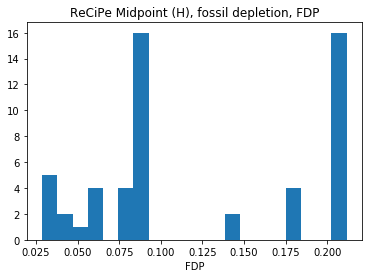

In [107]:
do_hist(recipes[4], ress[:,4])

Range ratio: 8.42121


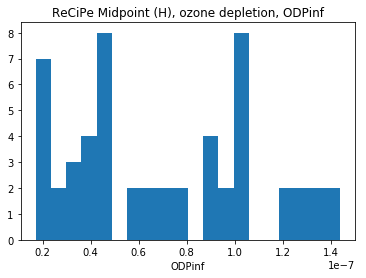

In [108]:
do_hist(recipes[5], ress[:,5])

Range ratio: 18.5893


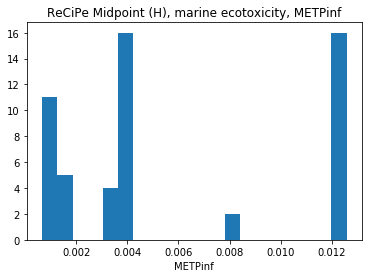

In [109]:
do_hist(recipes[6], ress[:,6])

Range ratio: 38.8237


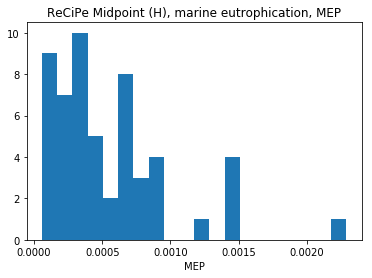

In [182]:
do_hist(recipes[17], ress[:,17])

## Part Ia - importance of various truck processes
Here we want to measure the number of times each process is referred to by others in the database.  This requires inspecting the constituents of the flat background and is not currently well supported in code.

How do we go about this?  We want to count the number of nonzero entries in a given row of the Ad and A matrices.

In [28]:
truck = lorries[1]

In [29]:
def count_deps(_process):
    _pr = _process.external_ref
    _fr = _process.reference().flow.external_ref
    _inx = bg._flat.index_of(_pr, _fr)
    if bg.is_in_background(_pr, _fr):
        _fgdep = bg._flat._ad[_inx, :].nnz
        return _fgdep + bg._flat._A[_inx, :].nnz
    else:
        return bg._flat._af[_inx,:].nnz


In [149]:
lorries[2].show()

Process Entity (ref 1651e66e-46d4-48db-92fb-b1d4445e2d2f)
origin: local.ecoinvent.3.4.cutoff
reference: market for transport, freight, lorry with refrigeration machine, 3.5-7.5 ton, EURO6, carbon dioxide, liquid refri(...)_5 [GLO] has Output:     transport, freight, lorry with refrigeration machine, 3.5-7.5 ton, EURO6, carbon dioxide, liquid refrigerant, cooling [CPC: 65111: Road transport services of freight by refrigerator vehicles] [metric ton*km]
            Name: market for transport, freight, lorry with refrigeration machine, 3.5-7.5 ton, EURO6, carbon dioxide, liquid refri(...)_5
         Comment: no comment.
 Classifications: ['EcoSpold01Categories: transport systems/road', 'ISIC rev.4 ecoinvent: 4923:Freight transport by road']
   TemporalScope: {'begin': '2010-01-01', 'end': '2017-12-31'}
    SpatialScope: GLO
ParentActivityId: c0f37020-5e27-4721-82bb-675757663e97


In [152]:
_pr = lorries[2].external_ref

In [153]:
_fr = lorries[2].reference().flow.external_ref

In [155]:
bg._flat.is_in_background(_pr, _fr)

True

In [30]:
len(lorries)

54

In [187]:
len([k for k in e34c_i.make_interface('index').processes(Name='^market')])

3966

In [186]:
_ = enum(e34c_i.make_interface('index').processes(Name='market for transport'))

 [00] market for transport, freight, lorry with refrigeration machine, freezing [GLO]
 [01] market for transport, tractor and trailer, agricultural [GLO]
 [02] transport, freight, lorry, all sizes, EURO6 to generic market for transport, freight, lorry, unspecified [RER]
 [03] market for transport, regular bus [GLO]
 [04] market for transport, pipeline, offshore, long distance, natural gas [GLO]
 [05] market for transport, freight, lorry with refrigeration machine, 3.5-7.5 ton, EURO3, R134a refrigerant, freezing [GLO]
 [06] transport, freight, lorry, all sizes, EURO6 to generic market for transport, freight, lorry, unspecified [RoW]
 [07] market for transport, passenger car, large size, petrol, EURO 3 [GLO]
 [08] market for transport, freight, sea, transoceanic ship with reefer, freezing [GLO]
 [09] market for transport, freight, inland waterways, barge [GLO]
 [10] market for transport, freight, sea, transoceanic ship with reefer, cooling [GLO]
 [11] market for transport, freight, lorry

In [31]:
lorries[15].show()

Process Entity (ref 5ce19503-5c6e-4b09-a208-6490a73b6a98)
origin: local.ecoinvent.3.4.cutoff
reference: market for transport, freight, lorry, unspecified [GLO] has Output:     transport, freight, lorry, unspecified [By-product classification: allocatable product] [metric ton*km]
            Name: market for transport, freight, lorry, unspecified
         Comment: no comment.
    SpatialScope: GLO
   TemporalScope: {'begin': '2012-01-01', 'end': '2017-12-31'}
 Classifications: ['EcoSpold01Categories: transport systems/road', 'ISIC rev.4 ecoinvent: 4923:Freight transport by road']
ParentActivityId: b3d67b4c-a9cf-4337-8577-ff57f544d404


In [32]:
count_deps(lorries[15])

1902

In [33]:
bg._flat.index_of(lorries[15].external_ref, lorries[15].reference().flow.external_ref)

475

In [39]:
_ixg = (_ix for _ix in bg._flat._ad[475,:].nonzero()[1])

In [43]:
next(_ixg)

8

In [48]:
_qg = (q for q in L.entities_by_type('quantity') if not isinstance(q.unit, str))

In [53]:
qw.show()

Quantity Entity (ref ecological scarcity 2013, total, Mineral resources)
origin: local.ecoinvent.3.1.lcia
reference: [UBP]
     Name: ecological scarcity 2013, total, Mineral resources
  Comment: Ecoinvent LCIA implementation
Indicator: Mineral resources
   Method: ecological scarcity 2013
 Category: total


In [47]:
bg._flat.fg[8].flow_ref

'd76e4ec3-a885-4978-aadc-d3d87d6cd08e'

In [177]:
sum([count_deps(p) for p in lorries])

2418

In [173]:
invs = e34c_inv.get(lorries[15].external_ref).show_inventory(lorries[15].reference().flow.external_ref)

Reference: cfbce515-3f54-4411-ad9d-3d26b7faa15a
 0  Input:     [0.129 [metric ton*km]] (#) transport, freight, lorry, unspecified [By-product classification: allocatable product]
 1  Input:     [0.113 [metric ton*km]] (#) transport, freight, lorry, unspecified [By-product classification: allocatable product]
 2  Input:     [0.04 [metric ton*km]] (#) transport, freight, lorry, unspecified [By-product classification: allocatable product]
 3  Input:     [0.00705 [metric ton*km]] (#) transport, freight, lorry, unspecified [By-product classification: allocatable product]
 4  Input:     [0.318 [metric ton*km]] (#) transport, freight, lorry, unspecified [By-product classification: allocatable product]
 5  Input:     [0.277 [metric ton*km]] (#) transport, freight, lorry, unspecified [By-product classification: allocatable product]
 6  Input:     [0.0984 [metric ton*km]] (#) transport, freight, lorry, unspecified [By-product classification: allocatable product]
 7  Input:     [0.0173 [metric to

In [176]:
for i in invs:
    print(e34c_i[i.termination])

transport, freight, lorry, all sizes, EURO3 to generic market for transport, freight, lorry, unspecified [RER]
transport, freight, lorry, all sizes, EURO4 to generic market for transport, freight, lorry, unspecified [RER]
transport, freight, lorry, all sizes, EURO5 to generic market for transport, freight, lorry, unspecified [RER]
transport, freight, lorry, all sizes, EURO6 to generic market for transport, freight, lorry, unspecified [RER]
transport, freight, lorry, all sizes, EURO3 to generic market for transport, freight, lorry, unspecified [RoW]
transport, freight, lorry, all sizes, EURO4 to generic market for transport, freight, lorry, unspecified [RoW]
transport, freight, lorry, all sizes, EURO5 to generic market for transport, freight, lorry, unspecified [RoW]
transport, freight, lorry, all sizes, EURO6 to generic market for transport, freight, lorry, unspecified [RoW]


In [162]:
count_deps(lorries[4])

1

In [119]:
truck.reference().flow.external_ref

'e06932cf-8d90-4eaf-acf5-091aa3ec885e'

In [142]:
bg.is_in_background(truck.external_ref, truck.reference().flow.external_ref)

False

In [120]:
row = bg._flat.index_of(truck.external_ref, truck.reference().flow.external_ref)

In [121]:
bg._flat._ad[row,:]

<1x4514 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [123]:
bg._flat._A[row,:]

<1x10375 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [143]:
bg._flat._A[row,:].nnz

1

In [126]:
from antelope_catalog.providers import EcospoldV2Archive

In [138]:
next(e34c_i.get_sources('local.ecoinvent.3.4.cutoff'))

'/data/LCI/Ecoinvent/3.4/ecoinvent 3.4_cutoff_ecoSpold02'

In [139]:
e34c_inv = EcospoldV2Archive(next(e34c_i.get_sources('local.ecoinvent.3.4.cutoff')), prefix='datasets')

local.data.LCI.Ecoinvent.3.4.ecoinvent 3.4_cutoff_ecoSpold02: /data/LCI/Ecoinvent/3.4/ecoinvent 3.4_cutoff_ecoSpold02


In [141]:
e34c_inv.get(bg._flat._bg[4453].term_ref).show_inventory()

market for wastewater treatment facility, capacity 5E9l/year [RoW]
 0 Output: {*} [1 [unit]]     wastewater treatment facility, capacity 5E9l/year [By-product classification: allocatable product]
 1  Input:     [ ---  [unit]] (#) wastewater treatment facility, capacity 5E9l/year [By-product classification: allocatable product]
 2  Input:     [ ---  [unit]] (#) wastewater treatment facility, capacity 5E9l/year [By-product classification: allocatable product]


In [88]:
_.nonzero

<bound method spmatrix.nonzero of <1x10375 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>>

In [191]:
ma = e34c_i['0a30d1a5-f5ab-4384-9ab0-06a66e56e47b']

In [192]:
recipes[0].show()

Quantity Entity (ref ReCiPe Midpoint (H), climate change, GWP100)
origin: local.ecoinvent.3.1.lcia
reference: [kg CO2-Eq]
     Name: ReCiPe Midpoint (H), climate change, GWP100
  Comment: Ecoinvent LCIA implementation
 Category: climate change
Indicator: GWP100
   Method: ReCiPe Midpoint (H)


In [193]:
res = qdb.do_lcia(recipes[0], bg.lci(ma.external_ref, ma.reference().flow.external_ref))

completed 66 iterations


In [194]:
res.show()

ReCiPe Midpoint (H), climate change, GWP100 [kg CO2-Eq] [LCIA] kg CO2-Eq
------------------------------------------------------------
      2.53 ReCiPe Midpoint (H), climate change, GWP100 [kg CO2-Eq] [LCIA]
